In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import weather_routing
import pandas


In [3]:
##################
# Waypoints for the Maridian 400
waypoints = pandas.DataFrame([
    (34.14104 , -119.25085,  'Channel Islands Start'),
    (32.72304, -121.86329 ,  'Meridian 400 Waypoint # 1 '),
    (31.65268 , -120.68278,  'Meridian 400 Waypoint # 2 '),
    (32.43059 , -119.12433,  'Cortez Bank Buoy'),
    (33.50608 , -118.62886,  'Catalina West End Gate'),
            ], columns=['lat', 'lng', 'name'])
##################

In [4]:
waypoints

,lat,lng,name
0,34.14104,-119.25085,Channel Islands Start
1,32.72304,-121.86329,Meridian 400 Waypoint # 1
2,31.65268,-120.68278,Meridian 400 Waypoint # 2
3,32.43059,-119.12433,Cortez Bank Buoy
4,33.50608,-118.62886,Catalina West End Gate


In [5]:
route = weather_routing.route_shortest_path(waypoints, hour_offset=0)

Channel Islands Start at 2024-12-24 04:00:00-08:00
starting time: 20241224 12 2024-12-24 04:00:00-08:00
Starting download GRIB2 file downloaded: grib_files/20241224-12-gfs.t12z.pgrb2.0p25.f000_34.39104_33.89104_240.99915_240.49915
0: twa=120 mag=203.7 dtg=154.5 sog=1.9
Starting download GRIB2 file downloaded: grib_files/20241224-12-gfs.t12z.pgrb2.0p25.f001_34.36147743956562_33.86147743956562_240.98346200731612_240.48346200731612
1: twa=52 mag=281.8 dtg=152.9 sog=2.2
Starting download GRIB2 file downloaded: grib_files/20241224-12-gfs.t12z.pgrb2.0p25.f002_34.36898265679064_33.86898265679064_240.93990730764148_240.43990730764148
2: twa=75 mag=199.1 dtg=148.6 sog=5.5
Starting download GRIB2 file downloaded: grib_files/20241224-12-gfs.t12z.pgrb2.0p25.f003_34.28174621016339_33.78174621016339_240.90350644471573_240.40350644471573
3: twa=75 mag=199.7 dtg=145.2 sog=4.4
Starting download GRIB2 file downloaded: grib_files/20241224-12-gfs.t12z.pgrb2.0p25.f004_34.21259012342549_33.71259012342549_24

In [6]:
route

,lat,lng,date,twa,mag,dtg,sog
0,34.141040,-119.250850,2024-12-24 04:00:00-08:00,NaN,NaN,NaN,NaN
1,34.111477,-119.266538,2024-12-24 05:00:00-08:00,120.0,203.719862,154.537156,1.938662
2,34.118983,-119.310093,2024-12-24 06:00:00-08:00,52.0,281.769593,152.945787,2.211422
3,34.031746,-119.346494,2024-12-24 07:00:00-08:00,75.0,199.076503,148.642889,5.541729
4,33.962590,-119.376330,2024-12-24 08:00:00-08:00,75.0,199.690153,145.247135,4.409794
5,33.885379,-119.440455,2024-12-24 09:00:00-08:00,75.0,214.590201,140.176762,5.630000
6,33.821624,-119.479954,2024-12-24 10:00:00-08:00,60.0,207.237051,136.610956,4.304772
7,33.726739,-119.549460,2024-12-24 11:00:00-08:00,60.0,211.356898,130.903456,6.670000
8,33.636174,-119.690231,2024-12-24 12:00:00-08:00,90.0,232.330281,122.185343,8.890000
9,33.565890,-119.837085,2024-12-24 13:00:00-08:00,75.0,240.158457,113.735135,8.470000


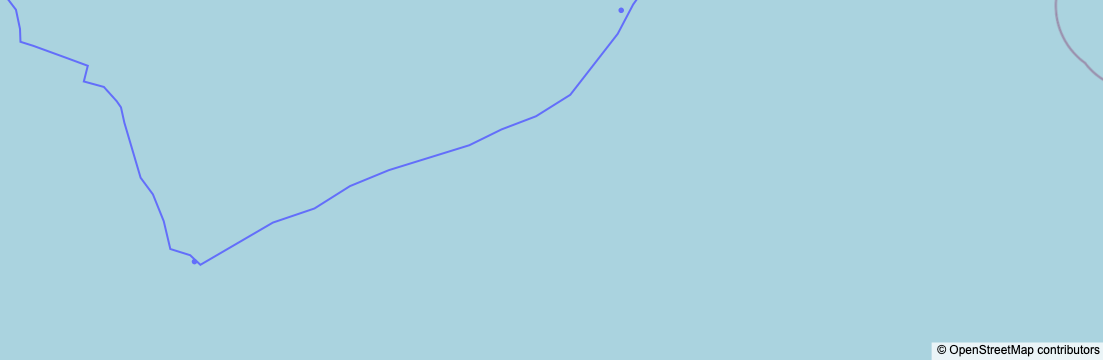

In [19]:
import plotly.express
fig = plotly.express.line_map(route, lat="lat", lon="lng", 
                              hover_name="date",
                              zoom=3, height=500)

scatter_points = plotly.express.scatter_map(waypoints,    
                lat="lat",
                lon="lng",
                hover_name="name")
fig.add_traces(scatter_points.data)

fig.update_layout(map_style="open-street-map", map_zoom=7, 
                  #map_center_lat = 33.9,
                  #map_center_lon=-118.5,
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.show()